<a href="https://colab.research.google.com/github/ernselito/Effect_of_Different_Optimizers/blob/master/Effect_of_Different_Optimizers_on_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zalando_research_fashionmnist_path = kagglehub.dataset_download('zalando-research/fashionmnist')

print('Data source import complete.')


## Objective

Optimizers are algorithms that dynamically fine-tune a model’s parameters throughout the training process, aiming to minimize a predefined loss function. These specialized algorithms facilitate the learning process of neural networks by iteratively refining the weights and biases based on the feedback received from the data. Well-known optimizers in deep learning encompass Stochastic Gradient Descent (SGD), Adam, and RMSprop, each equipped with distinct update rules, learning rates, and momentum strategies, all geared towards the overarching goal of discovering and converging upon optimal model parameters, thereby enhancing overall performance.

In view of this, this study aims to compare how each of these optimizer perform using the MNISt dataset.

##  Importing the required libraries and loading the Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.datasets import fashion_mnist

2025-10-21 01:14:37.179490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761009277.438175      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761009277.509727      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading the data

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

The above indicate the dimension of the training dataset. In this case, we will set aside about 10000 images their corresponding as a validation set.  The remaining set will be labelled as the training set.

In [ ]:
validation_images = X_train[-10000:, :, :]
validation_labels = y_train[-10000:]
train_images = X_train[:50000, :, :]
train_labels = y_train[:50000]

The labels of the data from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data is list below

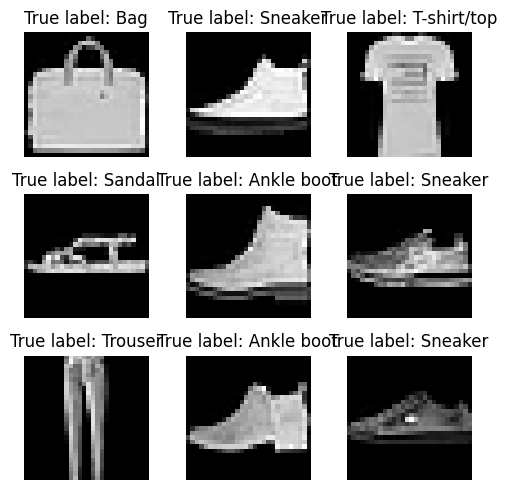

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = np.random.randint(0, len(train_images))
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f'True label: {class_labels[train_labels[index]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Before I feed the images into the neural network, I normalize the pixel values by dividing them by 255. This scales all pixel values from the original range of 0–255 down to a range of 0–1. This step helps my model train faster and more effectively by keeping the input values small and consistent, which improves the stability of the learning process.  

Also, Fashion MNIST images are grayscale with shape (28, 28). We add a channel dimension to get (28, 28, 1), as required by Conv2D layers in CNNs.

In [ ]:
def preprocess_images(images):
    return images.reshape((-1, 28, 28, 1)) / 255.0

train_images = preprocess_images(train_images)
validation_images = preprocess_images(validation_images)
X_test = preprocess_images(X_test)

In [ ]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax') ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-21 01:47:58.548020: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


validation_images = X_train[-10000:, :, :]
validation_labels = y_train[-10000:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define the optimizers to compare
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.001)
}

# Train and evaluate the model with each optimizer
results = {}
for name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(validation_images, validation_labels), verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[name] = test_acc

# Print the results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8491 - loss: 0.4275
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1400 - loss: 2.3022
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0998 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0993 - loss: 2.3019
Adam: 0.8476
SGD: 0.1411
RMSprop: 0.1000
Adagrad: 0.1000


- *Accuracy and Loss*: The accuracy and loss values indicate how well the model performed with each optimizer.
- *Optimizer Comparison*: The final line compares the performance of four optimizers:
    - *Adam*: Achieved an accuracy of 0.8476
    - *SGD (Stochastic Gradient Descent)*: Achieved an accuracy of 0.1411
    - *RMSprop*: Achieved an accuracy of 0.1000
    - *Adagrad*: Achieved an accuracy of 0.1000

Based on the output, *Adam* seems to be the best-performing optimizer for your model, with an accuracy of 0.8476. The other optimizers (SGD, RMSprop, and Adagrad) resulted in significantly lower accuracy values. Hence the *Adam* will be chosen for hyperparameter tuning


In [ ]:
# Define the learning rates to compare
learning_rates = [0.001, 0.01, 0.1]

# Define the Adam optimizer with different learning rates
results = {}
for learning_rate in learning_rates:
    model = create_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[learning_rate] = test_acc

# Print the results
for learning_rate, accuracy in results.items():
    print(f'Learning Rate: {learning_rate}, Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8314 - loss: 0.4628
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0978 - loss: 2.3036
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1001 - loss: 2.3136
Learning Rate: 0.001, Accuracy: 0.8254
Learning Rate: 0.01, Accuracy: 0.1000
Learning Rate: 0.1, Accuracy: 0.1000
